# Classification Model Performance

In [1]:
import pandas
import matplotlib.pyplot as plt

## Loading dataset

First, we use pandas to load the dataset from a csv file.

In [2]:
data = pandas.read_csv("E:\Courses\Machine Learning Supervised\s7s_repository\machine_learning_1\classification_model_performance\preprocessed_titanic_data.csv")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\mazen\AppData\Local\Temp\ipykernel_30152\2349062576.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pandas.read_csv("E:\Courses\Machine Learning Supervised\s7s_repository\machine_learning_1\classification_model_performance\preprocessed_titanic_data.csv")


,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


### Features-labels split and train-validation split

In [3]:
features = data.drop(["Survived"], axis=1)
labels = data["Survived"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# remark: we fix random_state the end, to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [6]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [7]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


### Training model on our dataset


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

c:\Users\mazen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

#### Accuracy

In [11]:
print("Scores of the model")
# use model score to print model accuracy
print(lr_model.score(features_test,labels_test))

Scores of the model
0.7988826815642458


#### False Positives, False Negatives and Confusion Matrix

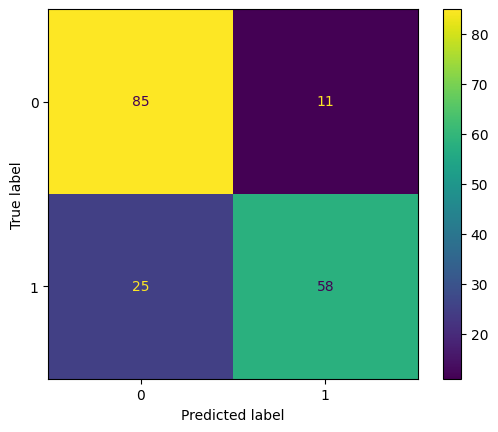

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# use sklearn confusion_matrix, ConfusionMatrixDisplay to plot the confusion matrix
y_p = lr_model.predict(features_test)
mat = confusion_matrix(labels_test,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()

#### Recall, Precision and F1-score

In [14]:
from sklearn.metrics import f1_score,recall_score,precision_score
# use sklearn f1_score,recall_score,precision_score to print the f1_score,recall_score,precision_score
# don't use average parameter
print("f-score = ",f1_score(labels_test, y_p))
print("recall_score = ",recall_score(labels_test, y_p))
print("precision_score = ",precision_score(labels_test, y_p))

f-score =  0.7631578947368421
recall_score =  0.6987951807228916
precision_score =  0.8405797101449275


### ROC and AUC

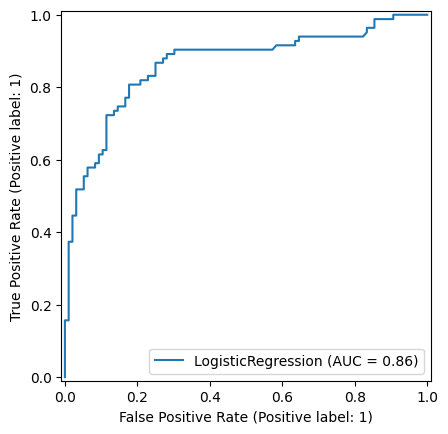

In [15]:
from sklearn.metrics import RocCurveDisplay
# use sklearn RocCurveDisplay to plot the ROC and AUC
RocCurveDisplay.from_estimator(lr_model,features_test,labels_test)
